# Clustering Basketball Shooting Data: Finding Patterns in How Players Score  

Have you ever wondered just *how* much Steph Curry loves the three-ball? What about SGA, king of the mid-range — how different is his shot profile from, say, Zion Williamson, who lives in the paint?  

NBA players have distinct shooting tendencies, but these tendencies aren’t always obvious just by looking at raw numbers. Sure, we can check a player’s shooting percentages from different distances, but how do we **see the bigger picture** 👀 ? How do we group players with similar scoring styles?  

This is where **clustering** comes in. Using a technique called Principal Component Analysis (PCA), we can simplify complex shooting data and uncover hidden patterns in how players score. In this tutorial, we’ll take real NBA shooting stats and break them down into meaningful groups—helping us answer questions like:  
- Who has a similar shot profile to Steph?  
- Which players rely the most on mid-range jumpers?  
- Are there clear groups of scorers based on shot selection?  

And the best part? You don’t need to be a data scientist to follow along. Whether you're the League Pass type or a casual follower, you’ll get to see how a little data magic can turn raw numbers into **meaningful insights**.  

Let’s dive in!

## Table of Contents
1. [What is Clustering? Why Does it Matter?](#section-1-what-is-clustering-and-why-does-it-matter)
2. [Getting the Data and Setting up our Notebook](#section-2-getting-the-data-and-setting-up-the-notebook)
3. [Data Cleaning and Feature Selection](#section-3-data-cleaning-and-feature-selection)
4. [Standardization and Dimensionality Reduction using PCA](#section-4-standardization-and-dimensionality-reduction)
5. [Summary and Next Steps](#summary)

## Section 1: What is Clustering and Why Does it Matter?

Basketball is a game of styles. Some players live at the rim, others thrive beyond the arc, and then there's everything in between. But how do we **group players** based on their shot selection?  

Imagine you're a coach or an analyst. You don’t have time to go through hundreds of players’ shooting charts one by one. Instead, you want a fast, automated way to find patterns — to group players with similar scoring tendencies. This is where **clustering** comes in.  

### 🔍 What is Clustering?  
Clustering is a technique used in data science that helps us group similar data points together. In our case, we’ll use clustering to find **players with similar shot profiles**. It is an *unsupervised* method, meaning the computer can cluster our data without us telling it in advance what groups to create.  

Think of it like this:  
- If we had a dataset of **animal sizes**, clustering might naturally separate elephants, dogs, and birds into distinct groups.  
- In basketball, we can use clustering to **separate players based on where they take their shots**—grouping mid-range specialists together, spotting three-point snipers, and identifying players who rely heavily on points in the paint.  

### 🏀 Why is Clustering Useful in Basketball?  
Scouting reports and analytics teams often use clustering to:  
✅ Compare players with similar styles (**“Find me the next James Harden”**)  
✅ Identify outliers (**“Who takes an unusually high number of corner threes?”**)  
✅ Improve game planning (**“Which opponents have similar shot tendencies?”**)  

With clustering, we **let the data speak for itself** — no need for pre-defined categories or manual sorting. Instead, we uncover natural patterns in the numbers.  

🔹 **Next Up:** We’ll set up our dataset and get ready to find hidden patterns in NBA shooting data.  

---

## Section 2: Getting the Data and Setting Up the Notebook  

Before we start analyzing NBA players' shooting tendencies, we need to get our hands on some real data. We'll be using an open-source dataset from Kaggle, which compiles NBA stats from [Basketball Reference](https://www.basketball-reference.com).

#### Step 1: Download the Data  
The dataset we need is available [here](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats). If you haven’t already, go ahead and download it (or you can access it via the Kaggle API). The key file we'll use is the **shooting** table, which contains detailed breakdowns of where players take their shots from.  

#### Step 2: Load the Data in Python  
We’ll be working in a Jupyter Notebook, so let’s first import the necessary libraries and load our dataset. If you haven't installed some of these libraries, you can do so with:

```python
!pip install pandas numpy matplotlib seaborn scikit-learn
```


We will need these libraries for the following tasks:
- `pandas` for data manipulation (loading the dataset, cleaning, etc.)
- `numpy` for numerical operations
- `matplotlib` and `plotly` for data visualization
- `sklearn` for clustering and PCA

Now let's import the libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Next, we'll load the dataset and take a quick look at the first few rows to understand the structure of the data.

In [65]:
df = pd.read_csv('shooting_data.csv', encoding='utf-8')
df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31871.0,2025,5025.0,A.J. Green,NaN,SG,25,3,NBA,MIL,...,0.368,0.423,0.714,0.938,0.000,0,0.302,0.513,2,1
1,31872.0,2025,5026.0,A.J. Lawson,NaN,SG,24,3,NBA,TOR,...,NaN,0.400,1.000,1.000,0.125,1,0.200,0.000,0,0
2,31873.0,2025,5210.0,AJ Johnson,NaN,SG,20,1,NBA,TOT,...,NaN,0.400,0.571,0.750,0.074,1,0.200,1.000,1,0
3,31874.0,2025,5210.0,AJ Johnson,NaN,SG,20,1,NBA,MIL,...,NaN,0.600,0.600,0.667,0.053,0,0.200,1.000,0,0
4,31875.0,2025,5210.0,AJ Johnson,NaN,SG,20,1,NBA,WAS,...,NaN,0.200,0.500,1.000,0.125,1,0.200,1.000,1,0


### Step 3: Understanding the Data
Before diving into PCA and clustering, let’s take a quick look at what’s inside this dataset.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17453 entries, 0 to 17452
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        17449 non-null  float64
 1   season                         17453 non-null  int64  
 2   player_id                      17449 non-null  float64
 3   player                         17453 non-null  object 
 4   birth_year                     200 non-null    float64
 5   pos                            17453 non-null  object 
 6   age                            17453 non-null  int64  
 7   experience                     17453 non-null  int64  
 8   lg                             17453 non-null  object 
 9   tm                             17453 non-null  object 
 10  g                              17453 non-null  int64  
 11  mp                             17453 non-null  int64  
 12  fg_percent                     17344 non-null 

This gives us a sense of the features available and what kind of data we’re working with. Specifically, we're interested in shot distribution columns—things like percentage of shots taken from different distances (0-3 ft, 3-10 ft, 10-16 ft, etc.)

Next, we’ll clean up the dataset and focus on the key shooting stats. Let’s go!

---

## Section 3: Data Cleaning and Feature Selection  

Now that we’ve loaded the data, it’s time to clean it up and extract the information we need. Since we’re clustering players based on their shot profiles, we need to make sure our dataset is structured properly.  

#### 🧹 Step 1: Filtering for the Modern NBA  
The dataset includes **every season since 1947**, but the game has changed a lot since then. For example, the three-point line was introduced in 1979/80, and the league has seen a surge in three-point attempts in recent years. 

We’ll filter the data to include only seasons from **2018/19 to 2023/24** to focus on the modern NBA.


In [ ]:
# Convert season to numeric and filter out seasons with little playing time
df_shooting = df[df['season'].between(2019, 2024)]
df_shooting = df_shooting[df_shooting['g'] > 35]

#### ❕ A note on Volume and Efficiency

So far, we’ve focused on *where* players take their shots from. But that’s only half the picture. 

Some players take a lot of shots (think Luka Doncic), while others are more selective (like a role player who mostly spots up for threes, e.g. KCP). 

To get a fuller understanding of shooting tendencies, we also need to know *how often* players shoot.

We might also need to consider *efficiency*. A player might take a lot of mid-range shots, but if they’re not making them at a high clip, they might be better off taking threes or attacking the rim.


In [68]:
# Get players per 36 minutes stats and filter
df_per_36 = pd.read_csv('p36.csv', encoding='utf-8')
df_per_36 = df_per_36[df_per_36['season'].between(2014, 2019)]
df_per_36 = df_per_36[df_per_36['g'] > 35]

#### 🎯 Step 2: Aggregating Players’ Multi-Season Data

Since each row in the dataset represents one player’s season, we need to merge multiple seasons into a single row per player.

We'll do this separately for both datasets:

- **Shooting Table**: Aggregating shot selection percentages (pct_fga_0_3, pct_fga_3p, etc.).
- **Per 36 Table**: Aggregating shooting volume (fga_per_36_min, 3pa_per_36_min, etc.) and efficiency (ft_percent).

🔹 **Weighted Aggregation**: Not all seasons should count equally. A player who played 80 games should have their stats weigh more than a season with 10 games. So, we’ll weight our aggregation by games played (g).

In [69]:
# Define the columns that describe shot profile
shot_columns = ['percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
                'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range',
                'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_range',
                'percent_fga_from_x3p_range',
                'fg_percent_from_x0_3_range', 'fg_percent_from_x3_10_range',
                'fg_percent_from_x10_16_range', 'fg_percent_from_x16_3p_range',
                'fg_percent_from_x2p_range',
                'fg_percent_from_x3p_range',
                'percent_corner_3s_of_3pa', 'corner_3_point_percent',
                'percent_dunks_of_fga', 'num_of_dunks']

volume_columns = ['fga_per_36_min',
                  'x2pa_per_36_min',
                  'x3pa_per_36_min',
                  'fta_per_36_min', 'ft_percent',]


# Aggregate shot selection data
df_shooting_grouped = df_shooting.groupby('player_id').apply(lambda x: 
    (x[shot_columns].multiply(x['g'], axis=0)).sum() / x['g'].sum()
).reset_index()

# Aggregate volume data
df_per_36_grouped = df_per_36.groupby('player_id').apply(lambda x: 
    (x[volume_columns].multiply(x['g'], axis=0)).sum() / x['g'].sum()
).reset_index()

#### 🔗 Step 3: Merging Shot Selection & Volume Data
Now that both datasets are aggregated at the player level, we can merge them.

In [70]:
# Retain player names
player_names = df_shooting[['player_id', 'player']].drop_duplicates(subset='player_id')

# Merge on player_id
df_final = df_shooting_grouped.merge(df_per_36_grouped, on='player_id')

# Add player names back
df_final = df_final.merge(player_names, on='player_id', how='left')


#### 🔑 Step 4: Choosing Features for Clustering

Now we have a much better dataset for clustering. Here’s what we’re working with:
- ✅ **Shot Selection** → % of FGAs from different distances (close-range, mid-range, three-pointers).
- ✅ **Shot Volume** → How many shots a player attempts per 36 minutes.
- ✅ **Free Throw %** → A useful efficiency metric (good shooters tend to have strong FT%).


| Feature                        | Meaning                                                                 |
|--------------------------------|-------------------------------------------------------------------------|
| percent_assisted_x2p_fg        | % of 2-point field goals that were assisted                    |
| percent_assisted_x3p_fg        | % of 3-point field goals that were assisted                    |
| percent_fga_from_x0_3_range    | % of shots at the rim                         |
| percent_fga_from_x3_10_range   | % of short mid-range shots                        |
| percent_fga_from_x10_16_range  | % of deep mid-range shots                       |
| percent_fga_from_x16_3p_range  | % of long two-pointers      |
| percent_fga_from_x3p_range     | % of three-pointers          |
| fg_percent_from_x0_3_range     | FG% of shots at the rim                                     |
| fg_percent_from_x3_10_range    | FG% of short mid-range shots                                    |
| fg_percent_from_x10_16_range   | FG% of deep mid-range shots                                   |
| fg_percent_from_x16_3p_range   | FG% of long two-pointers                  |
| fg_percent_from_x3p_range      | FG% of three-pointers                      |
| percent_corner_3s_of_3pa       | % of three-pointers that are corner 3s                 |
| corner_3_point_percent         | 3P% of corner 3s                                      |
| percent_dunks_of_fga           | % of field goal attempts that are dunks                        |
| num_of_dunks                   | Number of dunks                                                         |
| fga_per_36_min                 | Total FGA per 36 min                                      |
| x2pa_per_36_min                | Two-point attempts per 36 min                         |
| x3pa_per_36_min                | Three-point attempts per 36 min                              |
| fta_per_36_min                 | Free throw attempts per 36 min                                      |
| ft_percent                     | Free throw percentage                                                   |

🚀 Next Up: Standardizing the data & running PCA to simplify our clustering!

---

## Section 4: Standardization and Dimensionality Reduction

Now that we have cleaned up and enhanced our dataset, we can move on to standardizing the data and applying Principal Component Analysis (PCA).

This is important because:

- Clustering techniques perform better on standardized data 📏
- Some stats (like x3pa_per_36_min) have much larger values than others (ft_percent), so we don’t want one feature dominating

##### 🤔 What is Standardization?
Standardization is the process of transforming data so that it has a mean of 0 and a standard deviation of 1. This ensures all features are on the same scale, making it easier for our clustering algorithm to find patterns.

![scaling.png](scaling.png)

##### 🙇‍♂️ And Dimensionality Reduction? PCA??
PCA is a mathematical technique that:

1. Finds the most important patterns in our data
2. Condenses the information into fewer variables (called **principal components**)
3. Preserves as much of the original variation as possible

Instead of looking at every shooting stat separately, PCA lets us combine them into a few “super stats” that capture the biggest differences between players.

##### 🤷🏾‍♂️ Why use PCA?

- Makes clustering **more effective** by removing unnecessary details
- **Speeds up** computation (fewer dimensions = less work for our algorithm)
- Helps **visualize** the data (we can plot players in 2D!)

Think of it like summarizing a player’s shooting profile into the fewest meaningful numbers possible.

🚀 Next Step: Applying PCA to Our Shooting Data

---

#### 🏀 Step 1: Applying PCA to Player Shooting Data
Since PCA works best when data is standardized, we will:

1. **Select relevant shooting stats**
2. **Scale the data** so all stats contribute equally
3. **Apply PCA** and check how many components explain most of the variation

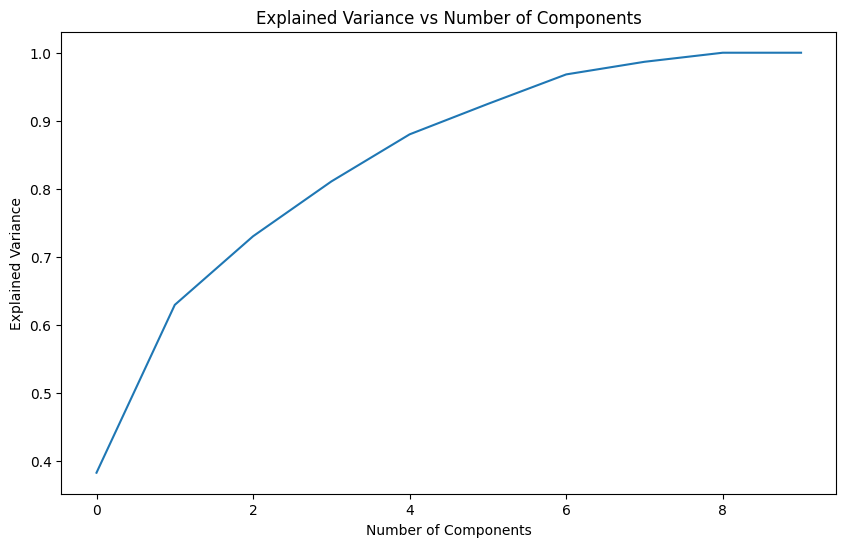

In [71]:
# Select relevant stats for PCA
# features = [*shot_columns, *volume_columns]
features = ['percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
            'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range',
            'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_range',
            'percent_fga_from_x3p_range',
            # 'fg_percent_from_x0_3_range', 'fg_percent_from_x3_10_range',
            # 'fg_percent_from_x10_16_range', 'fg_percent_from_x16_3p_range',
            'fg_percent_from_x2p_range',
            'fg_percent_from_x3p_range',
            'fga_per_36_min',
            # 'x2pa_per_36_min',
            # 'x3pa_per_36_min',
            ]

df_cluster = df_final[features]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

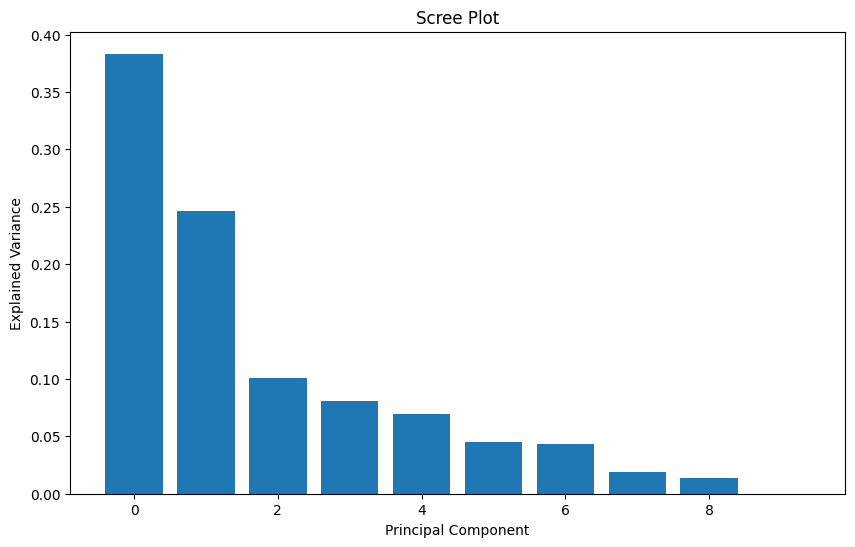

In [72]:
# Scree plot histogram

plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

Looking at the plot, we can see that most of the variance is captured within the first 3 to 5 components.

🔍 How Many Principal Components to Keep?
- The elbow point (where the curve starts flattening) looks to be around 3 or 4 components.
- Keeping 3 components should retain around 80-85% of the variance, which is solid for clustering.
- Keeping 4 components pushes us closer to 90% variance, making the representation even richer.

Since we want to visualize players in 2D, we’ll likely use only the first 2 components.

#### 🏀 Step 2: Transform the Data with PCA
We will:

- Extract the first 2 principal components that we identified earlier.
- Create a 2D representation of each player's shooting tendencies, which will help us visualize how similar (or different) players are.
- Plot the players in 2D space to see if we can spot any natural groupings.
- Make the plot interactive (with `plotly`) so we can hover over players and see their shooting splits.

In [73]:
# Now let's transform the scaled data to get the first 2 principal components
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df_scaled)

# Adding the transformed data (first 2 components) to our dataframe
df_final['pca_1'] = df_pca_2d[:, 0]
df_final['pca_2'] = df_pca_2d[:, 1]

# Let's visualize the transformed data
# plt.figure(figsize=(10, 8))
# plt.scatter(df_final['pca_1'], df_final['pca_2'], c=df_final['pca_1'], cmap='viridis')
# plt.colorbar(label='Principal Component 1')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA - Player Shooting Tendencies')
# plt.show()


In [74]:
# Create a new column for hover data
df_final['hover_data'] = df_final.apply(lambda row:
                                        f"{row['player']}<br>" +
                                        f"0 - 3ft: {row['percent_fga_from_x0_3_range']:.1%}<br>" +
                                        f"3 - 10ft: {row['percent_fga_from_x3_10_range']:.1%}<br>" +
                                        f"10 - 16ft: {row['percent_fga_from_x10_16_range']:.1%}<br>" +
                                        f"16 - 3pt: {row['percent_fga_from_x16_3p_range']:.1%}<br>" +
                                        f"3pt: {row['percent_fga_from_x3p_range']:.1%}",
                                        axis=1)

# Create a scatter plot with Plotly, including hover data
fig = px.scatter(df_final, x='pca_1', y='pca_2', 
                 custom_data=['hover_data'], 
                #  hover_data={'player': False, 'hover_data': True, 'pca_1': False, 'pca_2': False},
                 title='PCA - Player Shooting Tendencies')

# Update hover label font size
fig.update_traces(
    hovertemplate='%{customdata[0]}<extra></extra>',
    hoverlabel=dict(font_size=22)
)

# Change background color
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    # paper_bgcolor='rgba(0,0,0,0)'
)

# Update layout for better readability
fig.update_traces(marker=dict(size=14, opacity=0.4, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2"
)

fig.show()


#### 🏀 Step 3: Analyzing our plot

We can now see players plotted in 2D space, with each point representing a player’s shooting profile. By hovering over the points, a player’s name and shooting stats are displayed.

Interestingly, we see that Principal Component 1 (PC1) separates players based on their 3pt shooting tendencies. Players on the left side of the plot take more threes, while those on the right take fewer. PC2 seems to separate players based on their mid-range shooting.

## Summary

In this notebook, we explored NBA player shooting tendencies using data from the past few seasons. We cleaned and aggregated player data to ensure accuracy, accounting for seasonal variations and shot volume per game. We then merged shooting data with per-36-minute stats to get a more holistic view of player efficiency and shot selection.

To make the data more interpretable, we applied dimensionality reduction techniques (PCA) to approximate player shooting profiles in 2D space. This allowed us to visualize shooting styles and compare players at a glance.

Finally, we enhanced interactivity by adding hover functionality, making the plot more user-friendly for exploration.

#### **Key Takeaways**
- We successfully summarized complex shooting data into an intuitive visual representation.
- The dimensionality reduction approach worked well for making shooting profiles comparable.
- The final visualization provides a simple yet insightful tool for exploring player tendencies.

#### **Next Steps**
- ✅ Clustering players into shooting archetypes (e.g., sharpshooters, mid-range specialists).
- ✅ Using alternative dimensionality reduction techniques (t-SNE, UMAP) to capture non-linear shooting trends.
- ✅ Expanding the analysis beyond shooting to include playmaking, defense, or overall scoring efficiency.
- ✅ Deploying the visualization on a web app for even more interactivity.